In [1]:
# Import libraries for data manipulation, visualization, and machine learning
import numpy as np                     # For numerical operations and random samples
import pandas as pd                    # For data manipulation, DataFrames
import matplotlib.pyplot as plt        # For plotting and visualizations
from sklearn.datasets import make_regression # For generating synthetic regression data
from sklearn.model_selection import train_test_split # For splitting data into train and test sets
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV # For regression models
from sklearn.metrics import mean_squared_error     # For evaluating model performance (MSE)
import seaborn as sns   

In [2]:
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=42)

In [4]:
lr = LinearRegression()
alphas = np.logspace(-4,4,9)
rr_cv = RidgeCV(alphas=alphas, cv=5)
rr_cv.fit(X_train, y_train)
lr.fit(X_train, y_train)
rr_pred = rr_cv.predict(X_test)
lr_pred = lr.predict(X_test) # predict with the Linear model

# Evaluate performance with Mean Squared Error (MSE)
lr_mse = mean_squared_error(y_test, lr_pred)
rr_mse = mean_squared_error(y_test, rr_pred)

print(f"Linear Regression MSE (test set): {lr_mse:.2f}")
print(f"Ridge Regression MSE (test set): {rr_mse:.2f}")
print(f"Best alpha (lambda) for Ridge Regression: {rr_cv.alpha_:.5f}")

Linear Regression MSE (test set): 450.17
Ridge Regression MSE (test set): 448.33
Best alpha (lambda) for Ridge Regression: 1.00000


In [5]:
# Linear Regression coefficients and intercept
print("\nLinear regression coefficient:", lr.coef_)  # Displays the coefficients (weights) for Linear Regression
print("Linear regression intercept:", lr.intercept_)  # Displays the intercept (bias) for Linear Regression

# Ridge Regression coefficients and intercept
print("\nRidge regression coefficient:", rr_cv.coef_)  # Displays the coefficients (weights) for Ridge Regression
print("Ridge regression intercept:", rr_cv.intercept_)  # Displays the intercept (bias) for Ridge Regression


Linear regression coefficient: [97.74253971]
Linear regression intercept: 1.4230434087617034

Ridge regression coefficient: [94.35834942]
Ridge regression intercept: 1.1514384996764129


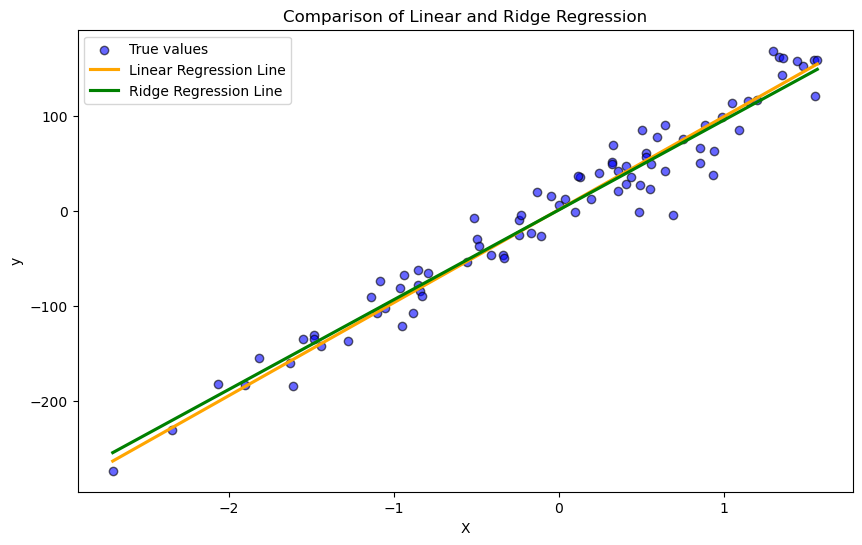

In [6]:
plt.figure(figsize=(10, 6))

# Scatter plot of the true values vs predicted values 
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='True values', edgecolors='k')

# Adding the Linear Regression Line 
sns.regplot(x=X_test.flatten(), y=lr_pred, scatter=False, color='orange', label='Linear Regression Line')

# Adding the Ridge Regression Line 
sns.regplot(x=X_test.flatten(), y=rr_pred, scatter=False, color='green', label='Ridge Regression Line')


plt.title('Comparison of Linear and Ridge Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [7]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


In [8]:
r = LinearRegression()

alphas = np.logspace(-4, 4, 9)  # Range of alpha values (log scale)
rr_cv = RidgeCV(alphas=alphas, cv=5)  # 5-fold cross-validation
rr_cv.fit(X_train, y_train)

# Make predictions
lr_pred = lr.fit(X_train, y_train).predict(X_test)
rr_pred = rr_cv.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
lr_mse = mean_squared_error(y_test, lr_pred)
rr_mse = mean_squared_error(y_test, rr_pred)

print(f"Linear Regression MSE (test set): {lr_mse:.2f}")
print(f"Ridge Regression MSE (test set): {rr_mse:.2f}")
print(f"Best alpha (lambda) for Ridge Regression: {rr_cv.alpha_:.5f}")

Linear Regression MSE (test set): 2900.19
Ridge Regression MSE (test set): 2856.49
Best alpha (lambda) for Ridge Regression: 0.10000
